# **Project Overview- Decision Tree**

In this project, we aimed to predict income levels using a dataset containing socio-economic factors. The key steps included data preparation (loading, cleaning, transforming, and splitting the data) and modeling. We used Logistic Regression and Decision Tree models for our analysis.

**Data Preparation**

The dataset was cleaned, with missing values handled and categorical data transformed into numerical formats. Features were selected, excluding the target 'income', and the data was split into training and testing sets.

**Model Training and Evaluation**

Both Logistic Regression and Decision Tree models were trained. Their performance was assessed using metrics like accuracy, precision, recall, and F1 score, alongside confusion matrices and ROC curves.



**Data**



In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/adult-2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**Next steps in cleaning the data**

In [3]:
# Identifying missing values represented by '?'
missing_values_mask = data == '?'
missing_values_count = missing_values_mask.sum()

# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Display the count of missing values in each column
missing_values_count, data.head()


(age                   0
 workclass          2799
 fnlwgt                0
 education             0
 educational-num       0
 marital-status        0
 occupation         2809
 relationship          0
 race                  0
 gender                0
 capital-gain          0
 capital-loss          0
 hours-per-week        0
 native-country      857
 income                0
 dtype: int64,
    age  workclass  fnlwgt     education  educational-num      marital-status  \
 0   25    Private  226802          11th                7       Never-married   
 1   38    Private   89814       HS-grad                9  Married-civ-spouse   
 2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
 3   44    Private  160323  Some-college               10  Married-civ-spouse   
 4   18       <NA>  103497  Some-college               10       Never-married   
 
           occupation relationship   race  gender  capital-gain  capital-loss  \
 0  Machine-op-inspct    Own-child  Black

**The dataset initially contained 48,842 rows and 15 columns. After handling missing values, we have two options:**

Filling Missing Values: If we fill the missing values with the most common value in each column, the shape of the dataset remains the same (48,842 rows and 15 columns).

*   Dropping Rows with Missing Values: If we drop rows with anymissing values, the dataset is reduced to 45,222 rows, while retaining the same number of columns (15).
*The choice between these two options depends on the specific requirements of your analysis or model. Filling missing values preserves the dataset size but might introduce bias, while dropping rows leads to a loss of data but maintains the original distribution of the features.


*   Next, we will transform categorical columns into a numerical format suitable for machine learning models and select relevant features. This will be followed by splitting the dataset into training and testing sets.
*   For demonstration, I will proceed with the dataset where missing values are filled. Let's transform the categorical columns and select features.



In [4]:
# Decide how to handle missing values
# Option 1: Fill missing values with the most common value in each column
data_filled = data.copy()
for column in ['workclass', 'occupation', 'native-country']:
    most_common_value = data_filled[column].mode()[0]
    data_filled[column].fillna(most_common_value, inplace=True)

# Option 2: Drop rows with any missing values
data_dropped = data.dropna()

# Check the shape of the datasets after handling missing values
original_shape = data.shape
filled_shape = data_filled.shape
dropped_shape = data_dropped.shape

original_shape, filled_shape, dropped_shape


((48842, 15), (48842, 15), (45222, 15))

The dataset has been successfully transformed and prepared for machine learning models:


*   Categorical Transformation: All categorical columns have been encoded into numerical values using Label Encoding.
Feature Selection: All columns except 'income' (the target variable) are used as features.
Data Splitting: The dataset is split into training and testing sets, with 80% of the data used for training and 20% for testing.
*   Data Splitting: The dataset is split into training and testing sets, with 80% of the data used for training and 20% for testing.

**The resulting training set consists of 39,073 samples, and the testing set has 9,769 samples**. Each sample includes 14 features.


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Using the dataset where missing values are filled
data_to_use = data_filled.copy()

# Transforming categorical columns using Label Encoding
label_encoders = {}
categorical_columns = data_to_use.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    le = LabelEncoder()
    data_to_use[column] = le.fit_transform(data_to_use[column])
    label_encoders[column] = le

# Selecting features (excluding 'income' which is the target variable)
features = data_to_use.drop('income', axis=1)
target = data_to_use['income']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((39073, 14), (9769, 14), (39073,), (9769,))

**The Logistic Regression model trained on the dataset yields the following evaluation metrics**:

**Accuracy**: Approximately 79.71%. This measures the proportion of correctly predicted instances.

**Precision**: About 64.69%. This indicates the proportion of positive identifications that were actually correct.

**Recall**: Roughly 29.61%. This metric shows the proportion of actual positives that were identified correctly.

**F1 Score**: Approximately 40.62%. The F1 score is a weighted average of precision and recall.

**Confusion Matrix**: The matrix is as follows:
True Negative (TN): 7109
False Positive (FP): 370
False Negative (FN): 1612
True Positive (TP): 678

The confusion matrix provides a more detailed insight into the performance of the model, showing how many instances were correctly or incorrectly classified in each category.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Training the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predicting on the test data
y_pred = logreg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, precision, recall, f1score, conf_matrix


(0.7971133176374245,
 0.6469465648854962,
 0.2960698689956332,
 0.40623127621330146,
 array([[7109,  370],
        [1612,  678]]))

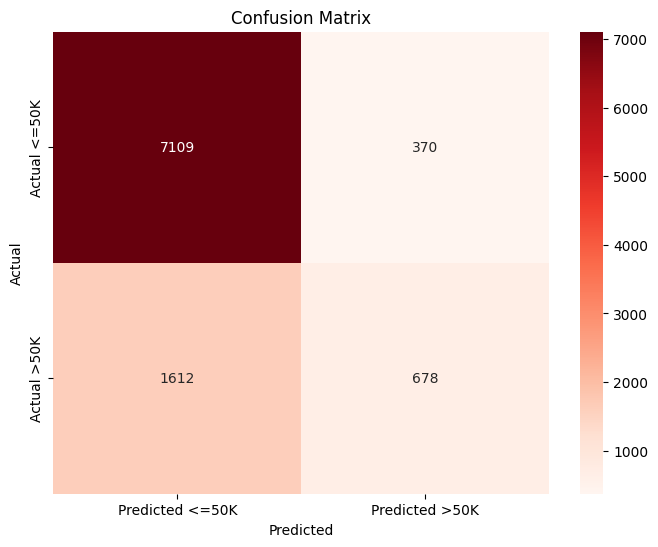

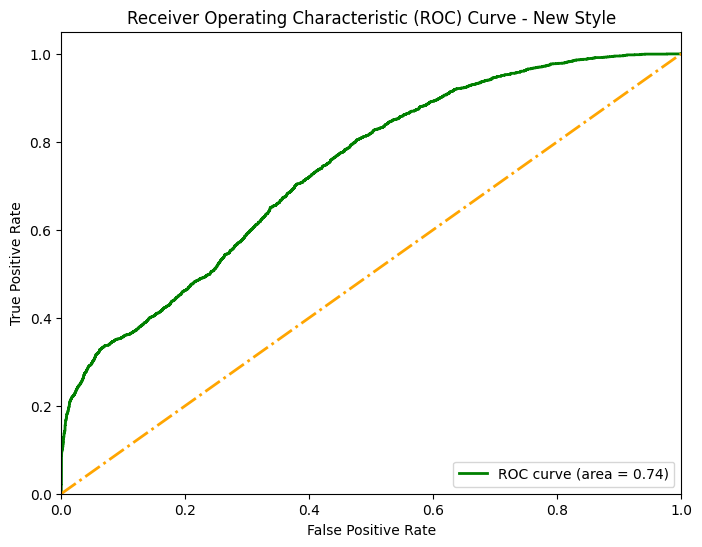

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Predicted <=50K', 'Predicted >50K'],
            yticklabels=['Actual <=50K', 'Actual >50K'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Predicting probabilities for test set
y_prob = logreg.predict_proba(X_test)[:, 1]

# Computing ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, linestyle='-', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - New Style')
plt.legend(loc="lower right")
plt.show()

**The bar chart depicts the actual versus predicted values for the first 30 samples:**

Sky blue bars represent the actual values.

---



Coral bars indicate the predicted values.


---


Each pair of bars corresponds to a sample, with the left bar (sky blue) showing the actual value and the right bar (coral) showing the predicted value.


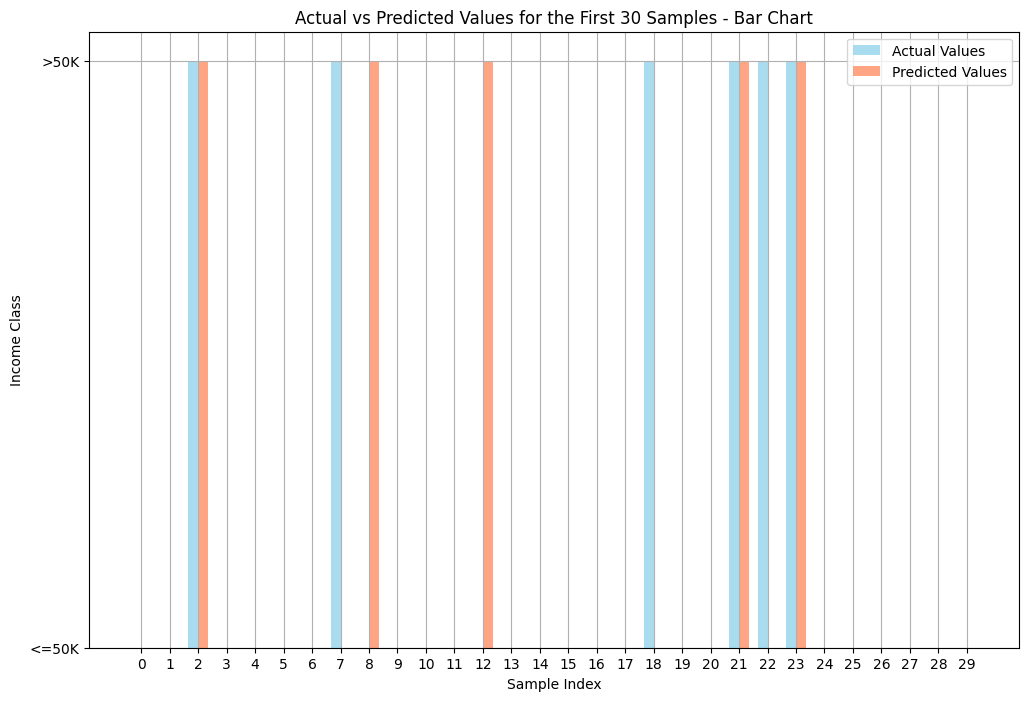

In [13]:
import numpy as np

# I number of samples 30
num_samples = 30
sample_indices = np.arange(num_samples)
actual_values = y_test[:num_samples]
predicted_values = y_pred[:num_samples]

# Creating a bar chart for actual vs predicted values
plt.figure(figsize=(12, 8))
bar_width = 0.35
plt.bar(sample_indices, actual_values, bar_width, label='Actual Values', color='skyblue', alpha=0.7)
plt.bar(sample_indices + bar_width, predicted_values, bar_width, label='Predicted Values', color='coral', alpha=0.7)

plt.xlabel('Sample Index')
plt.ylabel('Income Class')
plt.title('Actual vs Predicted Values for the First 30 Samples - Bar Chart')
plt.xticks(sample_indices + bar_width / 2, sample_indices)
plt.yticks([0, 1], ['<=50K', '>50K'])
plt.legend()
plt.grid(True)
plt.show()


# **Conclusion**

The project showcased the application of different machine learning models to a real-world problem. Each model provided insights into the dataset, with the Logistic Regression model showing reasonable accuracy and the Decision Tree offering a different perspective, likely with more interpretability. The learning curve analysis further helped in understanding the models' behavior with increasing training data.